In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
df = pd.read_csv("C:/Users/admin/Intern/Linear Rigression/AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-16,51.070000,51.790001,50.959999,51.625000,49.954624,110481600
1,2019-08-19,52.654999,53.182499,52.507500,52.587502,50.885971,97654400
2,2019-08-20,52.720001,53.337502,52.580002,52.590000,50.888390,107537200
3,2019-08-21,53.247501,53.412498,52.900002,53.160000,51.439960,86141600
4,2019-08-22,53.297501,53.610001,52.687500,53.115002,51.396420,89014800


In [27]:
df.shape

(1258, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [39]:
df = df.dropna()

In [40]:
#  We try to predict the next day's closing price using today’s closing price.
df['Next_close'] = df['Close'].shift(-1)

In [41]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Next_close
0,2019-08-16,51.070000,51.790001,50.959999,51.625000,49.954624,110481600,52.587502
1,2019-08-19,52.654999,53.182499,52.507500,52.587502,50.885971,97654400,52.590000
2,2019-08-20,52.720001,53.337502,52.580002,52.590000,50.888390,107537200,53.160000
3,2019-08-21,53.247501,53.412498,52.900002,53.160000,51.439960,86141600,53.115002
4,2019-08-22,53.297501,53.610001,52.687500,53.115002,51.396420,89014800,50.660000


In [43]:
df = df.dropna()

In [44]:
df.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Next_close    0
dtype: int64

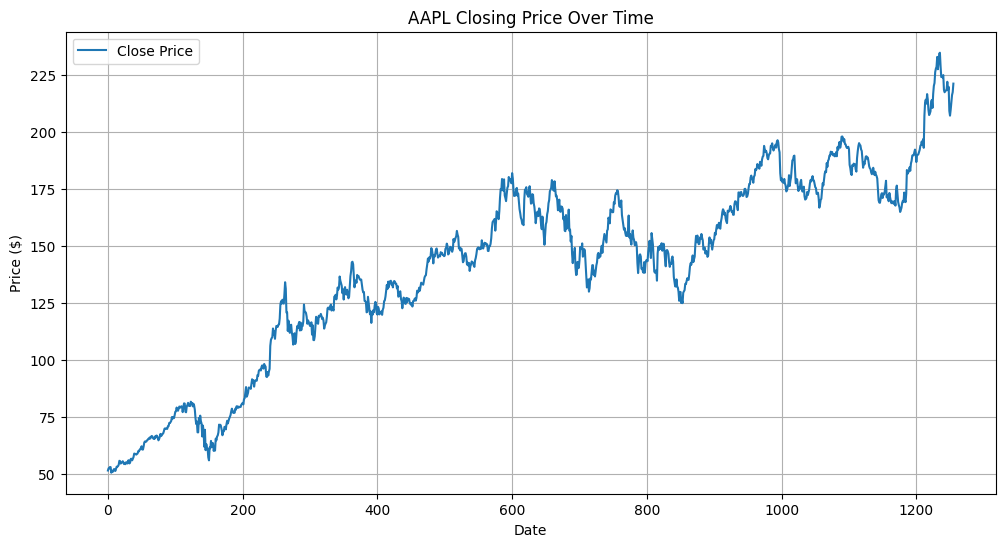

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
# plt.plot(df['Next_close'], label='Next close price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
X = df[['Close']] # today close
y = df['Next_close'] # next day close

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
y_pred = model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE : ", mse)
print("RMSE : ", rmse)
print("R2 Score : ", r2)

MSE :  7.511426929404422
RMSE :  2.7406982558108113
R2 Score :  0.9727801114611841


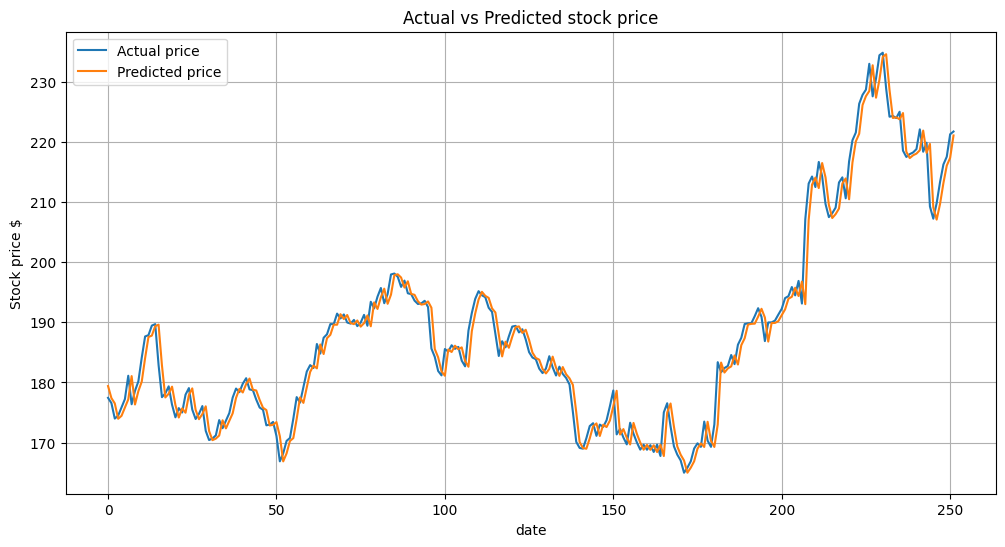

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual price')
plt.plot(y_pred, label='Predicted price')
plt.title("Actual vs Predicted stock price")
plt.xlabel("date")
plt.ylabel("Stock price $")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df = df.dropna()

In [55]:
X = df[['Close', 'MA10', 'MA50', 'Volume']]
y = df['Next_close']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
y_pred = model.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE : ", mse)
print("RMSE : ", rmse)
print("R2 Score : ", r2)

MSE :  7.513293585925027
RMSE :  2.7410387786248167
R2 Score :  0.9742417709608733
